In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aqleemkhan/heart-disease-2020")

print("Path to dataset files:", path)

100%|██████████| 3.13M/3.13M [00:00<00:00, 142MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aqleemkhan/heart-disease-2020/versions/1


In [7]:
dia=pd.read_csv("/root/.cache/kagglehub/datasets/aqleemkhan/heart-disease-2020/versions/1/heart_2020_cleaned.csv")

In [8]:
dia.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [9]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
dia.isnull().sum()


,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [11]:
ind=dia[["BMI","Smoking","AlcoholDrinking","Stroke","PhysicalHealth","MentalHealth","DiffWalking","Sex","AgeCategory","Race","Diabetic","PhysicalActivity","GenHealth","SleepTime","Asthma","KidneyDisease","SkinCancer"
]]
dep=dia["HeartDisease"]

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create dictionary to store encoders for each categorical column
LE = {}

# Encode all object columns in the entire dataset
for col in dia.columns:
    if dia[col].dtype == 'object':
        LE[col] = LabelEncoder()
        dia[col] = LE[col].fit_transform(dia[col])


In [13]:
# Decode all previously encoded object columns
for col in LE:   # iterate through stored encoders
    dia[col] = LE[col].inverse_transform(dia[col])


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Re-define ind and dep from the already encoded 'dia' DataFrame
for col in LE:
  if col in dia.columns and dia[col].dtype=="object":
    dia[col]=LE[col].transform(dia[col])
ind = dia.drop('HeartDisease', axis=1)
dep = dia['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

In [15]:
# --- USER INPUT SECTION ---

BMI = float(input("Enter BMI: "))
Smoking = input("Smoking (Yes/No): ").title()
AlcoholDrinking = input("Alcohol Drinking (Yes/No): ").title()
Stroke = input("Stroke (Yes/No): ").title()
PhysicalHealth = float(input("PhysicalHealth (0–30): "))
MentalHealth = float(input("MentalHealth (0–30): "))
DiffWalking = input("Difficulty Walking (Yes/No): ").title()
Sex = input("Sex (Male/Female): ").title()
AgeCategory = input("Age Category (e.g. 20-24, 30-34, 70-74, 80 or older): ")
Race = input("Race (White, Black, Asian, Hispanic, Other): ").title()

# Correct Diabetic mapping
Diabetic_input = input("Diabetic (Yes/No/Borderline): ").lower()

if Diabetic_input == 'yes':
    Diabetic = "Yes"
elif Diabetic_input == 'no':
    Diabetic = "No"
elif Diabetic_input == 'borderline':
    Diabetic = "No, borderline diabetes"
else:
    print("Invalid input, defaulting to 'No'")
    Diabetic = "No"

PhysicalActivity = input("Physical Activity (Yes/No): ").title()
GenHealth = input("General Health (Excellent/Very good/Good/Fair/Poor): ").title()
SleepTime = float(input("SleepTime (hours): "))
Asthma = input("Asthma (Yes/No): ").title()
KidneyDisease = input("KidneyDisease (Yes/No): ").title()
SkinCancer = input("SkinCancer (Yes/No): ").title()


# --- CREATE DATAFRAME FOR PREDICTION ---

pred = pd.DataFrame([[BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth,
                      DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity,
                      GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer]],
                    columns=ind.columns)


# --- APPLY LABEL ENCODING USING SAME ENCODERS USED FOR TRAINING ---

for col in pred.columns:
    if pred[col].dtype == 'object':
        pred[col] = LE[col].transform(pred[col])


# --- MAKE PREDICTION ---
result = model.predict(pred)

decoded_output = LE["HeartDisease"].inverse_transform(result)
print(decoded_output[0])



Enter BMI: 16.6
Smoking (Yes/No): yes
Alcohol Drinking (Yes/No): no
Stroke (Yes/No): no
PhysicalHealth (0–30): 3.0
MentalHealth (0–30): 30.0
Difficulty Walking (Yes/No): no
Sex (Male/Female): female
Age Category (e.g. 20-24, 30-34, 70-74, 80 or older): 60-64
Race (White, Black, Asian, Hispanic, Other): white
Diabetic (Yes/No/Borderline): no
Physical Activity (Yes/No): yes
General Health (Excellent/Very good/Good/Fair/Poor): good
SleepTime (hours): 5.0
Asthma (Yes/No): yes
KidneyDisease (Yes/No): no
SkinCancer (Yes/No): no
No


<Figure size 600x500 with 0 Axes>

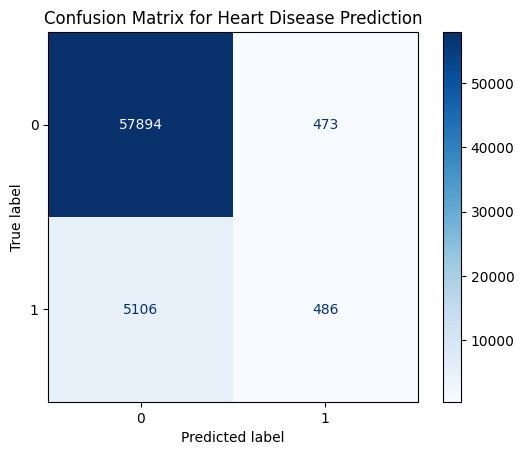

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ---- Load dataset ----
dia = pd.read_csv("/root/.cache/kagglehub/datasets/aqleemkhan/heart-disease-2020/versions/1/heart_2020_cleaned.csv")

# ---- Label Encoding all categorical columns ----
LE = {}
for col in dia.columns:
    if dia[col].dtype == 'object':
        LE[col] = LabelEncoder()
        dia[col] = LE[col].fit_transform(dia[col])

# ---- Independent & Dependent variables ----
ind = dia.drop("HeartDisease", axis=1)
dep = dia["HeartDisease"]

# ---- Train-test split ----
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.2, random_state=42)

# ---- Logistic Regression Model ----
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# ---- Predictions ----
y_pred = model.predict(X_test)

# ---- Confusion Matrix Graph ----
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(6,5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Heart Disease Prediction")
plt.show()
